In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
r_min = 2**(1/6)*2**(-1/6)
A = 1.2
r_cut = r_min*A
colors = ['blue','red','green','black','orange','purple','yellow']
from sklearn.decomposition import PCA as skPCA
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import DBSCAN




In [2]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
class CoulombMatrixSpectrum():
    
    def __init__(self, color='C4'):
        self.xwidth = 1
        self.color = color
    
    def descriptor(self,pos):
        connectivity_matrix = np.zeros((len(pos),len(pos)))
        distances = squareform(pdist(pos))
        for i in range(len(distances)):
            for j in range(len(distances[i])):
                if i != j:
                    connectivity_matrix[i][j] = 1/distances[i][j]
                if distances[i][j] < r_cut:
                    connectivity_matrix[i][j] = 1
                
        connectivity_matrix = np.array(connectivity_matrix)
        eigenvalues = np.real(np.linalg.eigvals(connectivity_matrix))
        return np.sort(eigenvalues) 

        
    def draw(self,pos,ax):
        vector = self.descriptor(pos)
        N = len(vector)
        xcenters = np.linspace(0,N-1,N) * self.xwidth
        ax.bar(xcenters,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([-2,8])
        ax.set_title(self.__class__.__name__)

    def _V(self,r):
        return 4*5*((2**(-1/6)/r)**12 - (2**(-1/6)/r)**6)


    def energy(self, pos):
        return np.sum(self._V(pdist(pos)))

In [19]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)  # For reproducibility
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_indices]

        for _ in range(self.max_iter):
            # Assign clusters based on closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Compute new centroids as the mean of assigned points
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        # Assign clusters based on closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

In [10]:
sklearn_pca = sklearnPCA(n_components=2)

asd = CoulombMatrixSpectrum()
descrip = [asd.descriptor(pos = position) for position in positions]


# fig, ax = plt.subplots(1,2,figsize=(10,5))
# for i in range(len(pca_datas)):
    # ax.scatter(*pca_datas[i][0],color = 'blue', alpha = 0.5, s=100)
# ax[0].scatter(pca_data[:,0],pca_data[:,1], color = 'blue', alpha = 0.5, s=300)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
descriptors_transformed_sklearn = sklearn_pca.fit_transform(descrip)
# ax = ax[1]
# ax.scatter(descriptors_transformed_sklearn[:,0],
        #    descriptors_transformed_sklearn[:,1],s=300,alpha=0.5,color='C2')
# fix, ax = plt.subplots(1,2,figsize=(10,5))
# descriptors_transformed_sklearn = sklearn_pca.fit_transform(rattled_descriptor)
# ax = ax[1]
# ax.scatter(descriptors_transformed_sklearn[:,0],
#            descriptors_transformed_sklearn[:,1],s=300,alpha=0.5,color='C2')



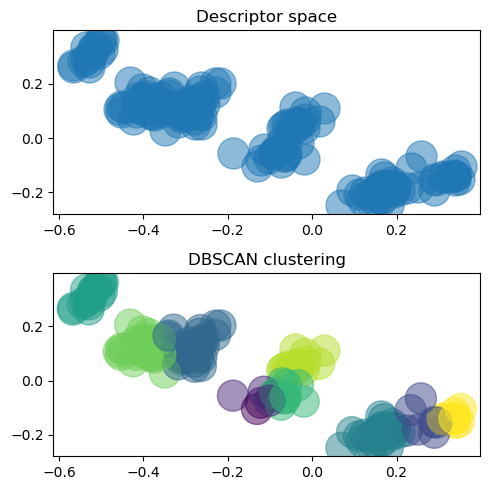

In [100]:
asd = CoulombMatrixSpectrum()
all_rattled_descriptor_pca = []

fig, ax = plt.subplots(2,1,figsize=(5,5))
for j in range (10):
    # print(j)
    rattle_cluster = positions[j+5]
    rattled_positions = [rattle_cluster + np.random.normal(0, 0.05, positions[j].shape) for _ in range(15)]
    all_rattled_positions = [rattle_cluster,*rattled_positions]
    rattled_descriptor = [asd.descriptor(all_rattled_positions[a]) for a in range(len(all_rattled_positions))]
    rattled_descriptor_pca = sklearn_pca.transform(rattled_descriptor)
    all_rattled_descriptor_pca.append(rattled_descriptor_pca)
    

    ax[0].scatter(*rattled_descriptor_pca.T, color='tab:blue', alpha=0.5, s=500)
    ax[0].set_title('Descriptor space')

all_rattled_descriptor_pca = np.vstack(all_rattled_descriptor_pca)
X= all_rattled_descriptor_pca

dbscan = DBSCAN(eps=0.05, min_samples=10)
labels = dbscan.fit_predict(X)
labels = kmeans.predict(all_rattled_descriptor_pca)
scatter = ax[1].scatter(X[labels != -1, 0], X[labels != -1, 1], c=labels[labels != -1], cmap='viridis', s=500, alpha=0.5)
ax[1].scatter(X[labels == -1, 0], X[labels == -1, 1], c='white', marker='.', s=50, edgecolors='black', label='Outliers')
# plt.colorbar(scatter, label="Cluster Label")
ax[1].set_title('DBSCAN clustering')


plt.tight_layout()



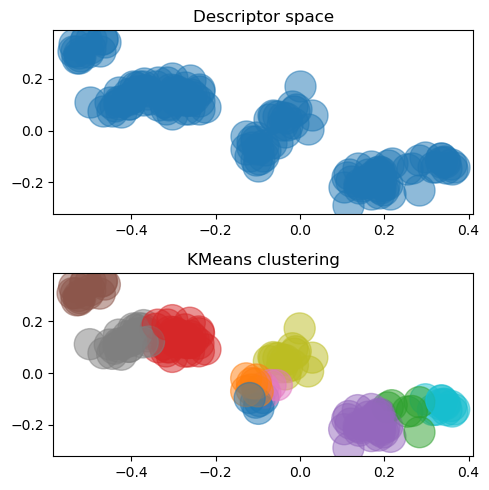

In [61]:
asd = CoulombMatrixSpectrum()
all_rattled_descriptor_pca = []

fig, ax = plt.subplots(2,1,figsize=(5,5))
for j in range (10):
    # print(j)
    rattle_cluster = positions[j+5]
    rattled_positions = [rattle_cluster + np.random.normal(0, 0.05, positions[j].shape) for _ in range(15)]
    all_rattled_positions = [rattle_cluster,*rattled_positions]
    rattled_descriptor = [asd.descriptor(all_rattled_positions[a]) for a in range(len(all_rattled_positions))]
    rattled_descriptor_pca = sklearn_pca.transform(rattled_descriptor)
    all_rattled_descriptor_pca.append(rattled_descriptor_pca)
    

    ax[0].scatter(*rattled_descriptor_pca.T, color='tab:blue', alpha=0.5, s=500)
    ax[0].set_title('Descriptor space')

all_rattled_descriptor_pca = np.vstack(all_rattled_descriptor_pca)
X= all_rattled_descriptor_pca

kmeans = KMeans(n_clusters=10)
kmeans.fit(all_rattled_descriptor_pca)
labels = kmeans.predict(all_rattled_descriptor_pca)
ax[1].scatter(X[:, 0], X[:, 1], c=[f'C{l}' for l in labels],alpha=0.5, s=500)
ax[1].set_title('KMeans clustering')

plt.tight_layout()



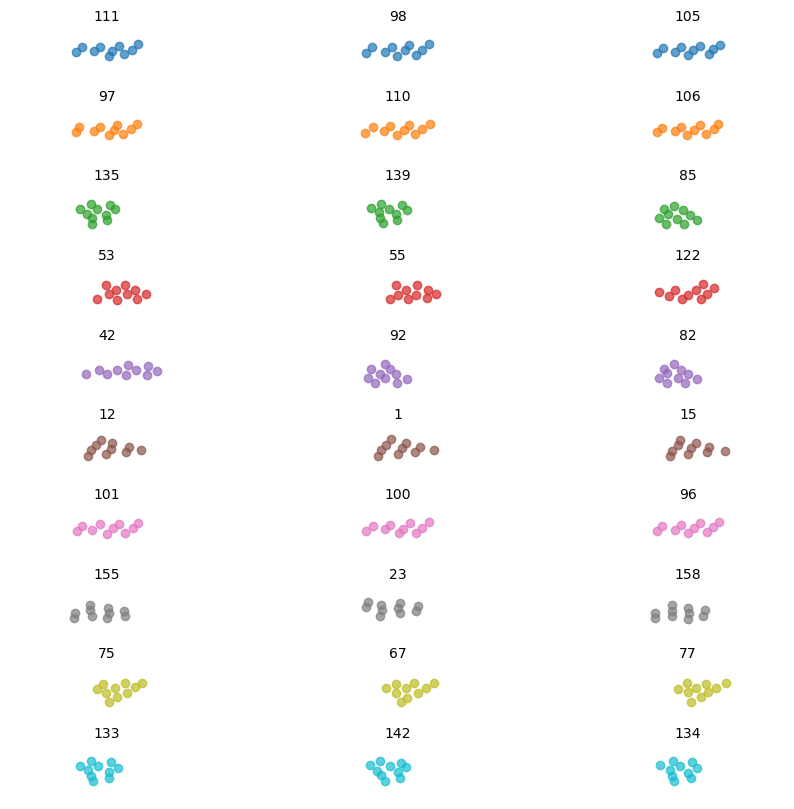

In [81]:
# Maintain a mapping of all descriptors to their corresponding positions
descriptor_to_position_map = []
for j, rattle_cluster in enumerate(positions[5:15]):
    rattled_positions = [rattle_cluster + np.random.normal(0, 0.05, rattle_cluster.shape) for _ in range(15)]
    all_rattled_positions = [rattle_cluster, *rattled_positions]
    descriptor_to_position_map.extend(all_rattled_positions)

descriptor_to_position_map = np.array(descriptor_to_position_map)

# Create a dictionary to store sampled indices for each cluster
cluster_samples = {cluster: [] for cluster in range(kmeans.n_clusters)}

# Number of samples to draw from each cluster
num_samples_per_cluster = 3

# Group points by cluster and sample indices
for cluster in range(kmeans.n_clusters):
    indices = np.where(labels == cluster)[0]
    cluster_samples[cluster] = random.sample(list(indices), min(num_samples_per_cluster, len(indices)))

# Plot sampled structures with respective cluster colors
# Improved plot with better spacing
# Plot sampled structures with respective cluster colors, hiding axes
fig, axs = plt.subplots(kmeans.n_clusters, num_samples_per_cluster, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for cluster, cluster_indices in cluster_samples.items():
    for sample_idx, index in enumerate(cluster_indices):
        ax = axs[cluster][sample_idx]
        pos = descriptor_to_position_map[index]  # Use the mapped positions
        ax.scatter(pos[:, 0], pos[:, 1], color=f'C{cluster}', alpha=0.7)
        ax.axis('off')  # Hide axes
        ax.set_title(f'{index}', fontsize=10)  # Optionally add the index as a title
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)

# plt.tight_layout()
plt.show()


